In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import graphviz
import seaborn as sns
sns.set(style="ticks")
plt.rcParams['figure.figsize'] = (16.0, 10.0)
plt.style.use('seaborn-colorblind')
%matplotlib inline
import numpy as np

In [24]:
import seaborn as sns
sns.set_style("whitegrid")

In [25]:
rd = pd.read_csv('rd-MG-SP-2018-2016.csv',skiprows=lambda idx: np.random.random() > .005 if idx != 0 else False)

/home/wilson_tayar/anaconda3/envs/tera-fev2018/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
rd = pd.read_csv("./rd-MG-SP-2018-2016.csv")

/home/wilson_tayar/anaconda3/envs/tera-fev2018/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (40,41,42,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
rd.shape

(7969252, 56)

In [26]:
rd["IND_UTI"] = rd["UTI_MES_TO"] > 0

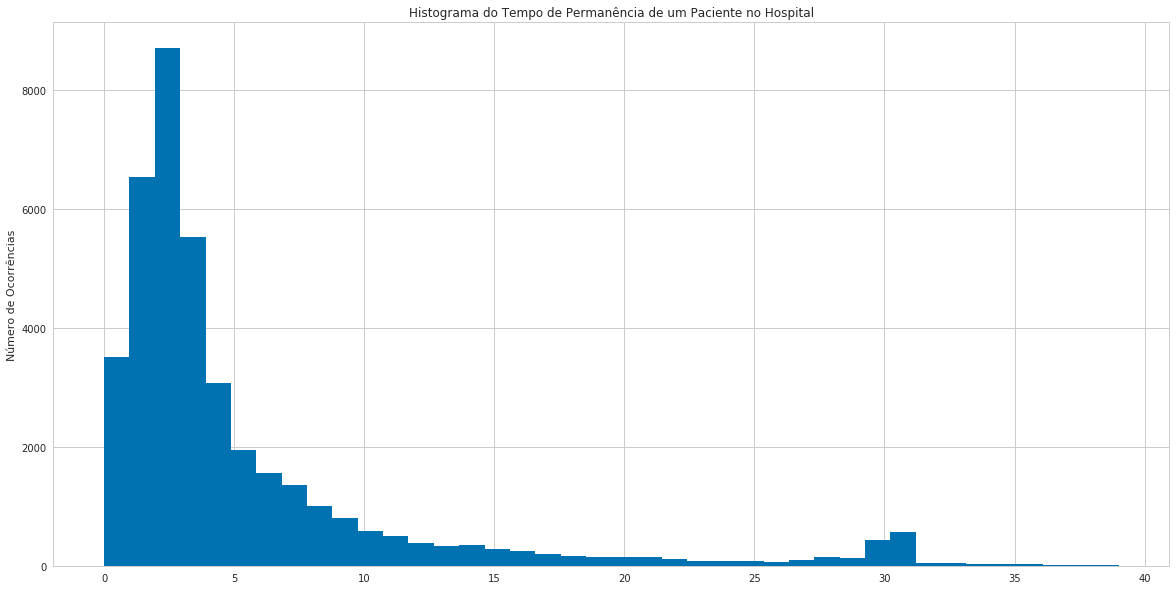

In [31]:
plt.figure(figsize=(20,10))
rd.loc[(rd["DIAS_PERM"] < 40),"DIAS_PERM"].hist(bins=40)
plt.title('Histograma do Tempo de Permanência de um Paciente no Hospital')
plt.ylabel('Número de Ocorrências')
#fig = plt.gcf()
#fig.set_size_inches(200, 100)
#fig.savefig('Hist_DIAS_PERM.png')
plt.show()

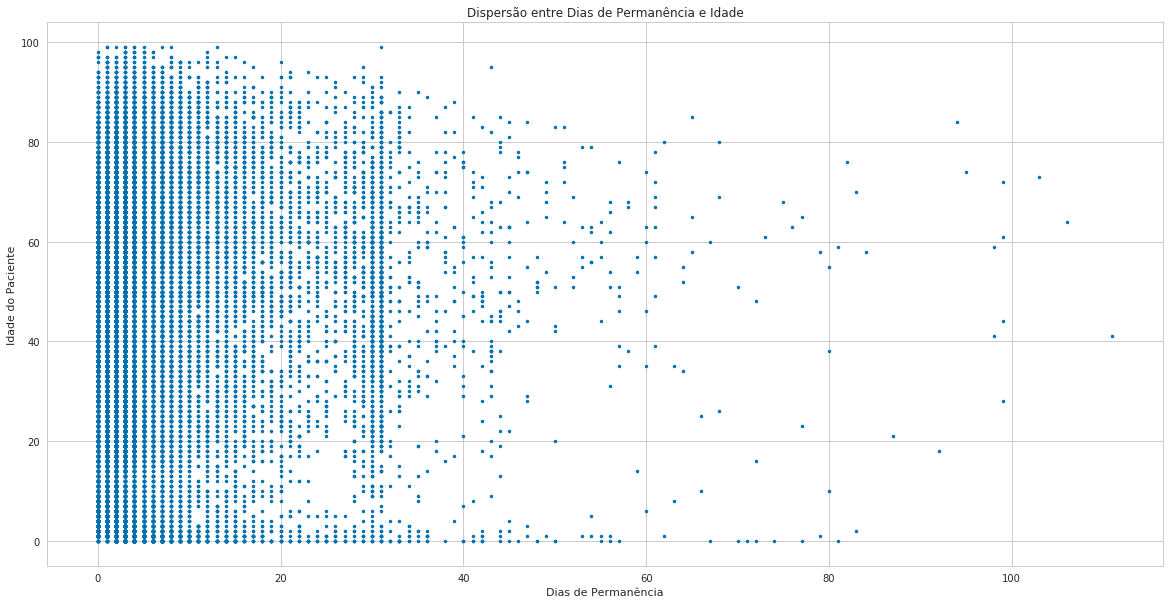

In [30]:
plt.figure(figsize=(20,10))
plt.plot(rd['DIAS_PERM'],rd['IDADE'],marker='.',linestyle='none')
plt.title('Dispersão entre Dias de Permanência e Idade')
plt.xlabel('Dias de Permanência')
plt.ylabel('Idade do Paciente')

plt.show()

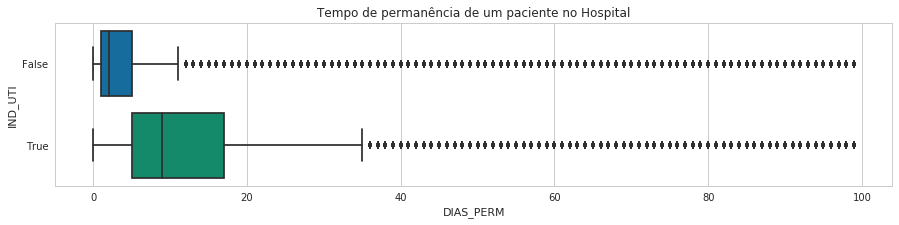

In [15]:
plt.figure(figsize=(15,3))
plt.title("Tempo de permanência de um paciente no Hospital")
#plt.ylabel('Paciente foi internado na UTI?')
dt = rd.loc[ ( ( rd["DIAS_PERM"] < 100 )) , ["IND_UTI" ,  "DIAS_PERM"] ]
sns.boxplot(y= "IND_UTI" , x = "DIAS_PERM" , data =  dt , orient="h")
#fig = plt.gcf()
#fig.set_size_inches(200, 600)
#fig.savefig('BOX_plot_IND_UTI.png')
plt.show()

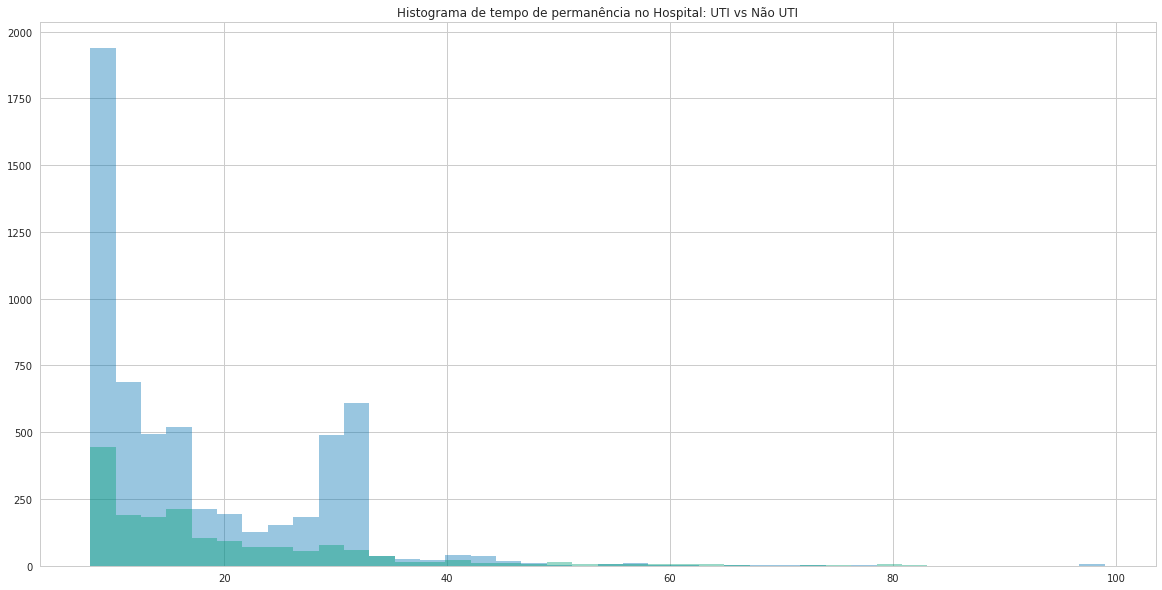

In [34]:
plt.figure(figsize=(20,10))
rd.loc[( (rd["DIAS_PERM"] >= 8) & (rd["DIAS_PERM"] < 100) & (rd["UTI_MES_TO"] == 0)),"DIAS_PERM"].hist(bins=40, alpha=.4)
rd.loc[( (rd["DIAS_PERM"] >= 8) & (rd["DIAS_PERM"] < 100) & (rd["UTI_MES_TO"] > 0)),"DIAS_PERM"].hist(bins=40, alpha=.4)
plt.title('Histograma de tempo de permanência no Hospital: UTI vs Não UTI' )
#fig = plt.gcf()
#fig.set_size_inches(200, 600)
#fig.savefig('BOX_plot_IND_UTI.png')
plt.show()

In [10]:
x = rd.loc[:,["IND_UTI","DIAG_PRINC","SEXO","IND_VDRL","IDADE","CAR_INT","NUM_FILHOS","PROC_SOLIC",
                "CONTRACEP1","CONTRACEP2","GESTRISCO","INSTRU","CNAER","DIAGSEC1",
               "DIAGSEC2","DIAGSEC3","DIAGSEC4","DIAGSEC5","DIAGSEC6","DIAGSEC7",
              # "TPDISEC1","TPDISEC2","TPDISEC3","TPDISEC4","TPDISEC5","TPDISEC6"
              ]]
y = rd["DIAS_PERM"]

x["DIAGSEC1"] = x["DIAGSEC1"].fillna(0)
x["DIAGSEC2"] = x["DIAGSEC2"].fillna(0)
x["DIAGSEC3"] = x["DIAGSEC3"].fillna(0)
x["DIAGSEC4"] = x["DIAGSEC4"].fillna(0)
x["DIAGSEC5"] = x["DIAGSEC5"].fillna(0)
x["DIAGSEC6"] = x["DIAGSEC6"].fillna(0)

#x["TPDISEC1"] = x["TPDISEC1"].fillna(0)
#x["TPDISEC2"] = x["TPDISEC2"].fillna(0)
#x["TPDISEC3"] = x["TPDISEC3"].fillna(0)
#x["TPDISEC4"] = x["TPDISEC4"].fillna(0)
#x["TPDISEC5"] = x["TPDISEC5"].fillna(0)
#x["TPDISEC6"] = x["TPDISEC6"].fillna(0)

x["DIAGSEC1"] = x["DIAGSEC1"].apply(lambda x : x if x == 0 else 1)
x["DIAGSEC2"] = x["DIAGSEC2"].apply(lambda x : x if x == 0 else 1)
x["DIAGSEC3"] = x["DIAGSEC3"].apply(lambda x : x if x == 0 else 1)
x["DIAGSEC4"] = x["DIAGSEC4"].apply(lambda x : x if x == 0 else 1)
x["DIAGSEC5"] = x["DIAGSEC5"].apply(lambda x : x if x == 0 else 1)
x["DIAGSEC6"] = x["DIAGSEC6"].apply(lambda x : x if x == 0 else 1)
x["DIAG_GRUPO"] = x["DIAG_PRINC"].apply( lambda x :  x[0])

x["PROC_SOLIC"] = x["PROC_SOLIC"].apply( lambda x :  str(x)[:3])
x["DIAGSEC"] =  x["DIAGSEC1"] + x["DIAGSEC2"] + x["DIAGSEC3"] + x["DIAGSEC4"] + x["DIAGSEC5"] + x["DIAGSEC6"]
x = x.drop(["DIAGSEC1","DIAGSEC2","DIAGSEC3","DIAGSEC4","DIAGSEC5","DIAGSEC6","DIAGSEC7","DIAG_PRINC"],axis='columns')
categorical_mask=["SEXO","IND_VDRL","CAR_INT","DIAG_GRUPO","PROC_SOLIC",\
                    "INSTRU","CNAER"]

x = pd.get_dummies(x,columns=categorical_mask)

In [11]:
rdc = None
rd = None

In [12]:
x.shape

(7969252, 133)

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=42)

In [14]:
x = None
y = None

In [16]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

/home/wilson_tayar/anaconda3/envs/tera-fev2018/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
gbm = xgb.XGBRegressor(n_estimators=25, max_depth=5, colsample_bytree=0.7)
gbm.fit(xtrain,ytrain)
predxgb = gbm.predict(xtest)
print( "MSE:  ", metrics.mean_squared_error(ytest,predxgb))
print( "RMSE:  ", metrics.mean_squared_error(ytest,predxgb)**(1/2))
print( "MAE:  ", metrics.mean_absolute_error(ytest,predxgb))
print( "R2:  ", metrics.r2_score(ytest,predxgb))

MemoryError: 